# Plotting Roofline Models

Sascha Hunold (TU Wien)

2018-03-20

## Version 1 - Very Basic Roofline Model

Warning message:
“Removed 48 rows containing missing values (geom_path).”

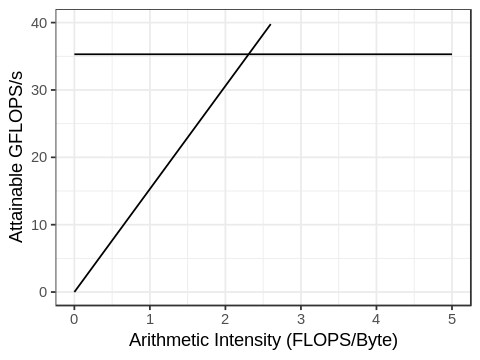

In [3]:
library(ggplot2)

options(repr.plot.width=4, repr.plot.height=3)

peak_gflops <- 35.3
peak_bw_gbs <- 15.3

fun.perf <- function(x) peak_gflops
fun.bw   <- function(x) peak_bw_gbs * x

ggplot(data.frame(x = c(0, 5)), aes(x)) +
  stat_function(fun = fun.perf, geom = "line") +
  stat_function(fun = fun.bw, geom = "line") +
  ylim(0,40) +
  xlab("Arithmetic Intensity (FLOPS/Byte)") +
  ylab("Attainable GFLOPS/s") +
  theme_bw()

# Version 2 - With Colors and Ceilings

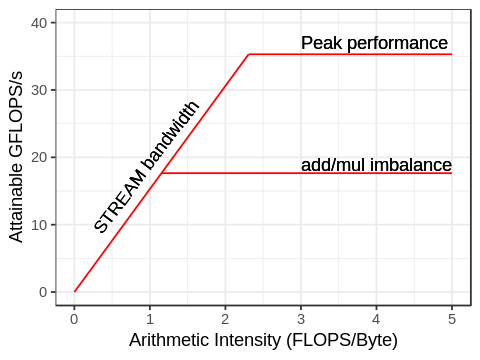

In [4]:
library(ggplot2)

options(repr.plot.width=4, repr.plot.height=3)

peak_gflops <- 35.3
peak_bw_gbs <- 15.3

ridge_point <- peak_gflops/peak_bw_gbs

fun.perf <- function(x) peak_gflops
fun.bw   <- function(x) peak_bw_gbs * x

fun.perf_imbal_muladd <- function(x) peak_gflops/2
muladd_ridgepoint <- peak_gflops/2/peak_bw_gbs

ggplot(data.frame(x = c(0, 5)), aes(x)) +
  stat_function(fun = fun.perf, xlim = c(ridge_point, 5), geom = "line", colour = "red") +
  stat_function(fun = fun.perf_imbal_muladd, xlim = c(muladd_ridgepoint, 5), geom = "line", colour = "red") +
  stat_function(fun = fun.bw, xlim = c(0, ridge_point), geom = "line", colour = "red") +
  geom_text(x = 3, y = 37, label = 'Peak performance', hjust=0) +
  geom_text(x = 3, y = 19, label = 'add/mul imbalance', hjust=0) +
  geom_text(x = 0.3, y = 9, label = 'STREAM bandwidth', hjust=0, angle=53) +
  ylim(0,40) +
  xlab("Arithmetic Intensity (FLOPS/Byte)") +
  ylab("Attainable GFLOPS/s") +
  theme_bw()

## Version 3 - Interactive with plotly

In [5]:
library(ggplot2)
library(plotly)

options(repr.plot.width=4, repr.plot.height=3)

peak_gflops <- 35.3
peak_bw_gbs <- 15.3

ridge_point <- peak_gflops/peak_bw_gbs

fun.perf <- function(x) peak_gflops
fun.bw   <- function(x) peak_bw_gbs * x

fun.perf_imbal_muladd <- function(x) peak_gflops/2
muladd_ridgepoint <- peak_gflops/2/peak_bw_gbs

p <- ggplot(data.frame(x = c(0, 5)), aes(x)) +
  stat_function(fun = fun.perf, xlim = c(ridge_point, 5), geom = "line", colour = "red") +
  stat_function(fun = fun.perf_imbal_muladd, xlim = c(muladd_ridgepoint, 5), geom = "line", colour = "red") +
  stat_function(fun = fun.bw, xlim = c(0, ridge_point), geom = "line", colour = "red") +
  geom_text(x = 3, y = 37, label = 'Peak performance', hjust=0) +
  geom_text(x = 3, y = 19, label = 'add/mul imbalance', hjust=0) +
  geom_text(x = 0.3, y = 9, label = 'STREAM bandwidth', hjust=0, angle=53) +
  ylim(0,40) +
  xlab("Arithmetic Intensity (FLOPS/Byte)") +
  ylab("Attainable GFLOPS/s") +
  theme_bw()

ggplotly(p)

We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`


HTML widgets cannot be represented in plain text (need html)

## The Case with the Memory Mountain

In [6]:
df <- read.table("mountain_0.dat", header = TRUE, row.names = 1, skip=2)
df[1:3,1:3]
df2 <- df
names(df2) <- NULL
rownames(df2) <- NULL
df2[1:3,1:3]
print(paste("nrow=", nrow(df)))
print(paste("ncol=", ncol(df)))
rev(rownames(df))

s1     s2     s3    
32m 8637.8 7805.6 6091.8
16m 8445.2 7375.1 6237.8
8m  8320.7 7642.1 6680.7

[,1]   [,2]   [,3]  
1 8637.8 7805.6 6091.8
2 8445.2 7375.1 6237.8
3 8320.7 7642.1 6680.7

[1] "nrow= 15"
[1] "ncol= 64"


[1] "2k"    "4k"    "8k"    "16k"   "32k"   "64k"   "128k"  "256k"  "512k" 
[10] "1024k" "2m"    "4m"    "8m"    "16m"   "32m"

In [7]:
plot_ly(z=~df2, type = "surface", width=900, height=600) %>% 
  layout(title = 'Memory Mountain',
         scene=list(xaxis = list(title = 'Stride', range = c(1, 64)),
                    yaxis = list(title = 'Data size', range = c(1, 15), 
                                tickvals=seq(1,15), 
                                ticktext=rownames(df),
                                tickangle = 50
                                ),
                   camera = list(
                                eye=list(x=1.5, y=-1.25, z=1.25)
                              )
                   ))

HTML widgets cannot be represented in plain text (need html)